In [ ]:
!pip install easyocr
!git clone https://github.com/ceyxasm/computer_vision.git

In [11]:
import cv2
from google.colab.patches import cv2_imshow

#### 1. (Spot the diff) Given a stitched image containing two very similar scenes,
find out the differences. (a) Submit your implementation. (b) Write down
your algorithm in brief. (c) Show the image where differences are suitably
marked. (d) Write down scenarios when your implementation may not work.

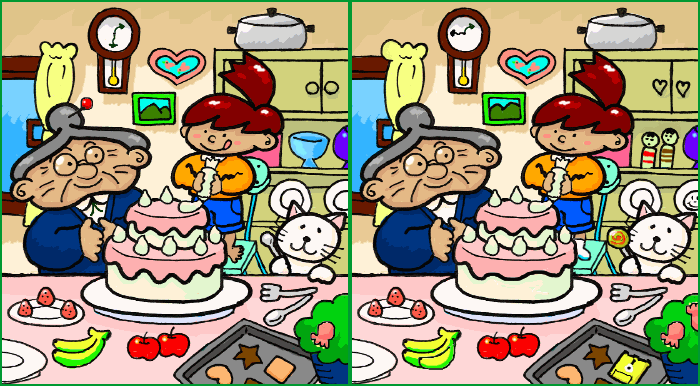

In [ ]:
img= cv2.imread('/content/computer_vision/csl7360/A1/Assignment-1/Problem-1/Spot_the_difference.png')
cv2_imshow(img)

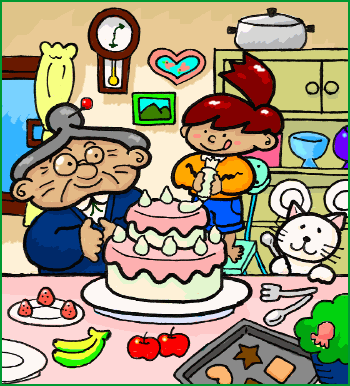

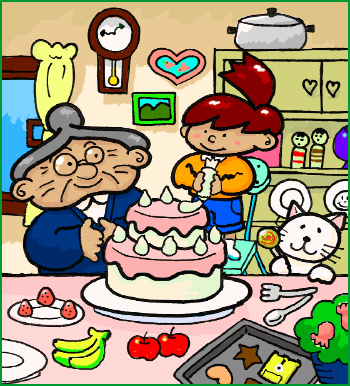

In [ ]:
# image split in 2
h, w, _= img.shape
w_cut= w //2

s1= img[:, :w_cut]
s2= img[:, w_cut:]
cv2_imshow(s1)
cv2_imshow(s2)

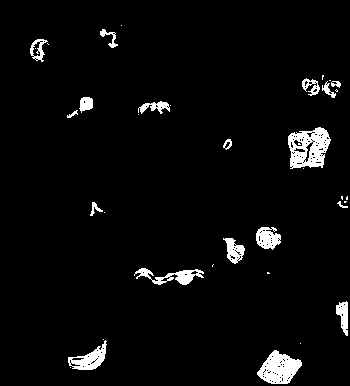

In [ ]:
'''
both images are converted to grayscale, difference is calculated and thresholded
'''
gray1 = cv2.cvtColor(s1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(s2, cv2.COLOR_BGR2GRAY)

diff = cv2.absdiff(gray1, gray2)

thresholded = cv2.threshold(diff, 25, 255, cv2.THRESH_BINARY)[1]
cv2_imshow(thresholded)

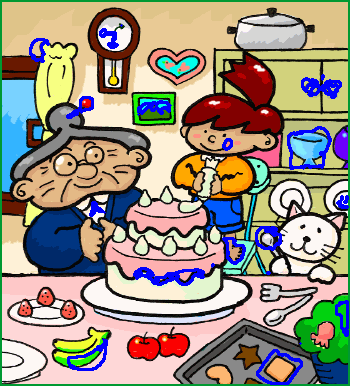

In [ ]:
'''
contours are drawn along the edges of our thresholded image,
which spots our difference
'''
contours, hierarchy = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

img_with_contours = s1.copy()
cv2.drawContours(img_with_contours, contours, -1, (255,0,0), 2)

cv2_imshow( img_with_contours)

#### 2. (Distance in images-1) Given an image of the map of India, find out the
pixel distance between two states. [Hint: use off-the-shelf OCR] (a) Submit
your implementation. (b) Write down the limitations of your approach.

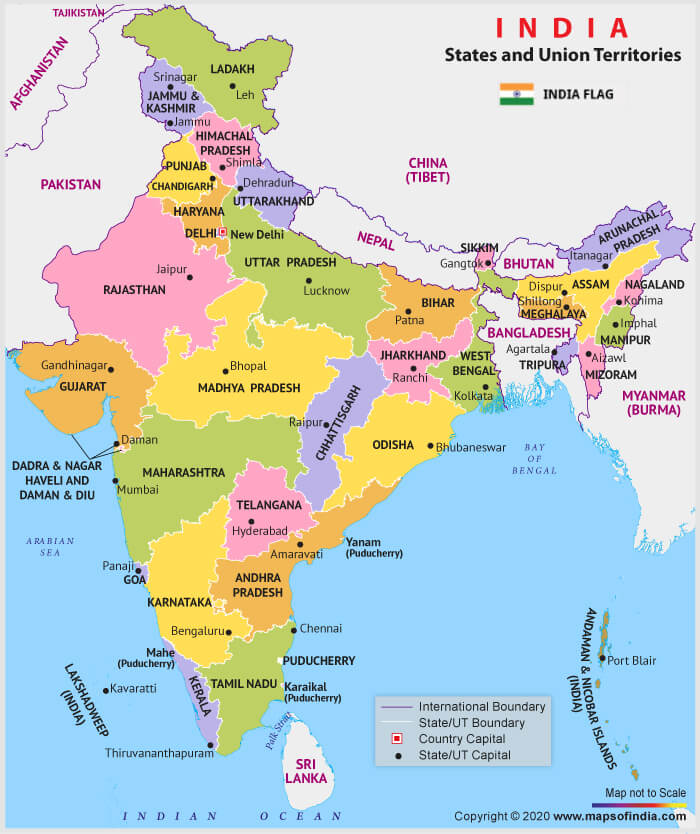

In [3]:
import cv2 
from google.colab.patches import cv2_imshow
map = cv2.imread('/content/computer_vision/csl7360/A1/Assignment-1/Problem-2/india-map.jpg')
cv2_imshow(map)

In [ ]:
import easyocr

reader= easyocr.Reader(['en'])
result= reader.readtext('/content/india-map.jpg')

In [ ]:
# detected text
c=0
places= []
for i in result:
  places.append(i[1])
  print(i[1], c)
  c+=1
]

Tniikistan 0
N D | A 1
States and Union Territories 2
LADAKH 3
Srinagal 4
JAMMU 5
Leh 6
INDIA FLAG 7
KASHMIR 8
Jammnu 9
HIMACHAD 10
PRADESH 11
PUNAB 12
Shimla 13
CHINA 14
PAKISTAN 15
CHANDIGARH 16
Dehradun 17
(TIBET) 18
UTTARAKHAND 19
HARYANA 20
DELH 21
New Delhl 22
UTTAR PRADESH 23
Gangto 24
BHUTAN 25
(tanagar 26
Jaipur 27
RAJASTHAN 28
Lucknow 29
ASSAM 30
NAGALAND 31
BIHAR 32
hillong 33
hima 34
Pata 35
MEGHAL 36
uphal 37
BANGLADESH 38
IPUR 39
Agartala 40
IHARKHAND 41
WEST  42
awl 43
Gandhinagar; 44
Bhopal 45
Ranchi 46
BENGAL 47
MIZORAM 48
GUJARAT 49
MADHYA PRADESH 50
Kolkata 51
MYANMAR 52
(BURMA) 53
Raipur 54
Danan 55
ODISHA 56
ubaneswar 57
DADRA & NAGAR 58
A FNGAt 59
MAHARASHTRA 60
HAVELI AND 61
DAMAN 62
DIU 63
Mumbal 64
TELANGANA 65
Hyderabad 66
ARABAN 67
Yanam 68
3 E A 69
AManju 70
(Puducherty) 71
Panaji 72
GOA 73
ANDHRA 74
PRADESH 75
KARNATAKA 76
Bengalurue 77
Chennai 78
Mahe 79
(Puducheny) 80
PUDUCHERRY 81
Port Dlalr 82
Kavaratti 83
TAMIL NADU Karaikal 84
(Puduc herry) 85
Interna

In [ ]:
# format of our result
result[1]

([[514, 12], [632, 12], [632, 44], [514, 44]], 'N D | A', 0.8921351917046209)

In [ ]:
''' of all the text detected, all is not useful
therefore states are cherry picked and organized in proper data format

> the midpoint of the coordinates of the text is taken as its location,
> this is used to calculate the distance
'''
states_index= [3, 5, 10, 12, 16, 19, 20, 21, 23, 28, 30, 31, 32,
               36, 39, 41, 42, 48, 49, 50, 56, 60, 73, 74, 76, 84, 97]
state_names= ['LADAKH', 'JAMMU AND KASHMIR', 'HIMACHAL PRADESH', 'PUNJAB', 
              'CHANDIGARH', 'UTTARAKHAND', 'HARYANA', 'DELH', 'UTTAR PRADESH', 
              'RAJASTHAN', 'ASSAM', 'NAGALAND', 'BIHAR', 'MEGHALYA', 'MANIPUR', 
              'JHARKHAND', 'WEST BENGAL', 'MIZORAM', 'GUJARAT', 'MADHYA PRADESH',
              'ODISHA', 'MAHARASHTRA', 'GOA', 'ANDHRA PRADESH', 'KARNATAKA', 'TAMIL NADU', 'ARUNACHAL PRADESH']

state_dict ={}
state_codes= []
for i in range( len(states_index)):
  key = str( states_index[i])

  state_codes.append( (state_names[i], states_index[i])  )

  coords= result[ states_index[i]][0]
  x_coord= 0
  y_coord= 0
  for i in coords:
    x_coord= x_coord + i[0]
    y_coord= y_coord + i[1]
  
  x_coord= x_coord/4
  y_coord= y_coord/4
  state_dict[ key]= [x_coord, y_coord]

state_dict

{'3': [234.0, 70.0],
 '5': [168.0, 96.0],
 '10': [225.0, 137.0],
 '12': [187.0, 166.0],
 '16': [184.0, 186.0],
 '19': [275.0, 201.0],
 '20': [199.0, 211.0],
 '21': [199.0, 234.0],
 '23': [291.0, 262.0],
 '28': [135.0, 290.0],
 '30': [592.0, 284.0],
 '31': [655.0, 285.0],
 '32': [440.0, 303.0],
 '36': [542.0, 314.0],
 '39': [638.0, 340.0],
 '41': [414.0, 356.0],
 '42': [479.0, 356.0],
 '48': [612.0, 374.0],
 '49': [84.0, 387.0],
 '50': [250.0, 388.0],
 '56': [394.0, 446.0],
 '60': [183.0, 473.0],
 '73': [135.0, 580.0],
 '74': [258.0, 578.0],
 '76': [181.0, 602.0],
 '84': [270.0, 686.0],
 '97': [628.5, 225.5]}

In [ ]:
print('State names and cooresponding number code is given:\n ')
print( state_codes)

State names and cooresponding number code is given:
 
[('LADAKH', 3), ('JAMMU AND KASHMIR', 5), ('HIMACHAL PRADESH', 10), ('PUNJAB', 12), ('CHANDIGARH', 16), ('UTTARAKHAND', 19), ('HARYANA', 20), ('DELH', 21), ('UTTAR PRADESH', 23), ('RAJASTHAN', 28), ('ASSAM', 30), ('NAGALAND', 31), ('BIHAR', 32), ('MEGHALYA', 36), ('MANIPUR', 39), ('JHARKHAND', 41), ('WEST BENGAL', 42), ('MIZORAM', 48), ('GUJARAT', 49), ('MADHYA PRADESH', 50), ('ODISHA', 56), ('MAHARASHTRA', 60), ('GOA', 73), ('ANDHRA PRADESH', 74), ('KARNATAKA', 76), ('TAMIL NADU', 84), ('ARUNACHAL PRADESH', 97)]


In [ ]:
code1= input('enter first code: ')
code2= input('enter second code: ')

coor_diff= [ state_dict[code1][0]- state_dict[ code2][0], state_dict[code1][1] - state_dict[ code2][1]  ] 

from numpy.linalg import norm
dist= norm( coor_diff)

print(f'pixel distance is {dist}')

enter first code10
enter second code3
pixel distance is 67.60177512462228


#### 3. (Distance in images-2) Given an image of a circle, find out the area and
perimeter in the pixel unit. Submit your implementation such that it takes
the image file as an argument and prints the area and perimeter in new lines.

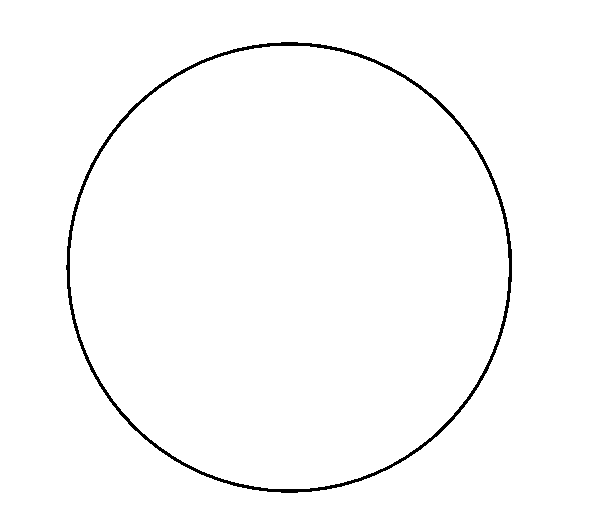

In [ ]:
circle= cv2.imread( '/content/computer_vision/csl7360/A1/circle-updated.png')
circle = cv2.cvtColor(circle, cv2.COLOR_BGR2GRAY)
circle = cv2.threshold(circle, 25, 255, cv2.THRESH_BINARY)[1]
cv2_imshow( circle)

In [ ]:
''' we try to find the thickness of circle by looking at the segment extended from the diameter'''

min_line_width= 1000000
line_pixel_count= 0

for row in circle:
  line_width=0
  flag_turn_b2w= False
  flag_turn_w2b= False
  for col in row:
    if col==0:
      line_width+= 1
      line_pixel_count +=1
    if line_width>0 and col==255:
      flag_turn_b2w= True
    if flag_turn_b2w and col==0:
      flag_turn_w2b= True
  if flag_turn_w2b:
    min_line_width= min( min_line_width, line_width//2)

print(f'width of perimeter is {min_line_width} pixels\n there are {line_pixel_count} pixels in the perimeter')

width of perimeter is 3 pixels
 there are 4569 pixels in the perimeter


In [ ]:
import numpy as np
circumference= line_pixel_count/min_line_width

radius= circumference/(2*np.pi)
area= np.pi*radius*radius

print( f'circumference: {circumference}')
print( f'area: {area}')

circumference: 1523.0
area: 184582.25299750047


#### 4 (Towards reading time) Given an image of a clock find out the angle
between the hour and minute hands. (a) Submit your implementation. (b)
Write down your approach for finding out the angle. (c) Write down the
limitations of your approach.

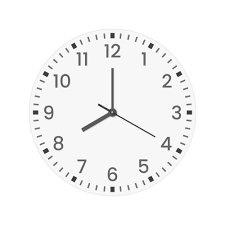

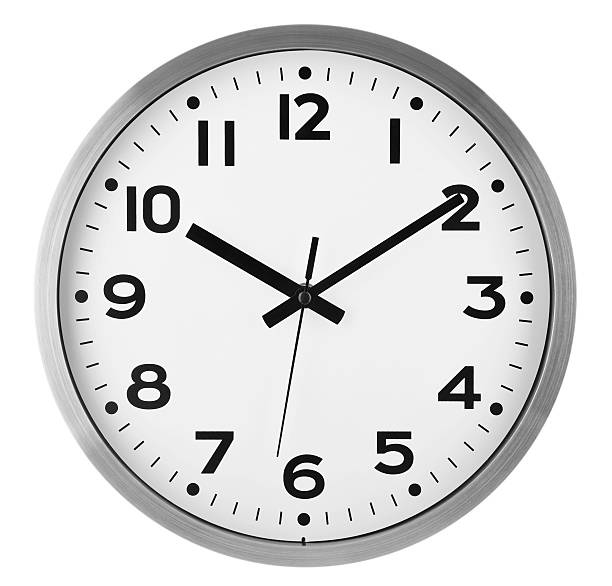

In [6]:
clk1_clr= cv2.imread('/content/computer_vision/csl7360/A1/Assignment-1/Problem-4/clock_1.png')
clk2_clr= cv2.imread('/content/computer_vision/csl7360/A1/Assignment-1/Problem-4/clock_2.jpg')

h1, w1= clk1_clr.shape[0], clk1_clr.shape[1] 
h2, w2= clk2_clr.shape[0], clk2_clr.shape[1]

clk1_gray = cv2.cvtColor(clk1_clr, cv2.COLOR_BGR2GRAY)
# clk1= cv2.GaussianBlur( clk1,  (7,7) ,1.8)
# clk1 = cv2.threshold(clk1, 170, 190, cv2.THRESH_BINARY)[1]

clk2_gray = cv2.cvtColor(clk2_clr, cv2.COLOR_BGR2GRAY)
# clk2 = cv2.threshold(clk2, 180, 190, cv2.THRESH_BINARY)[1]


cv2_imshow(clk1_gray)
cv2_imshow(clk2_gray)

In [7]:

def fine_line_purge( img, thickness):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  blurred = cv2.GaussianBlur(gray, (5, 5), 0)
  edges = cv2.Canny(blurred, 50, 150)

  lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 10, minLineLength=50, maxLineGap=10)

  result = img.copy()

  
  '''code can be changed to make this a parameter'''

  # Iterate through the lines and erase all lines with the specified thickness
  for line in lines:
      x1, y1, x2, y2 = line[0]
      if abs(x2-x1) <= thickness or abs(y2-y1) <= thickness:
          continue
      cv2.line(result, (x1, y1), (x2, y2), (255, 255, 255), thickness)

  mask = np.zeros(img.shape, dtype=np.uint8)
  mask[:] = (255, 255, 255)

  # Bitwise-AND the mask and the copy of the original image to erase the lines with the specified thickness
  result = cv2.bitwise_and(result, mask)

  # cv2_imshow( img)
  cv2_imshow( result)
  return result

##### For clock 1

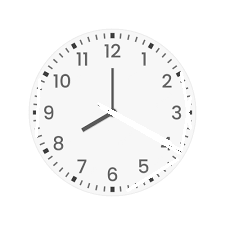

cleand clock



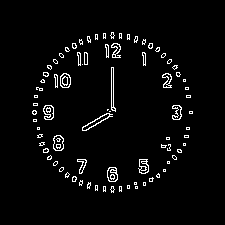

In [9]:
import numpy as np
clk1_clean= fine_line_purge( clk1_clr, thickness=2)
print('cleand clock\n')
_, binary = cv2.threshold(clk1_clean, 128, 255, cv2.THRESH_BINARY )
edge= cv2.Canny( binary, 100, 500, apertureSize=7)
cv2_imshow( edge)

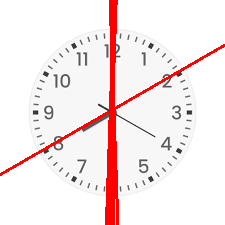

In [10]:
import numpy as np

thetas= []
r_s=[]
lines = cv2.HoughLines(edge, 1, np.pi/180, 45)
for r_theta in lines:
    arr = np.array(r_theta[0], dtype=np.float64)
    r, theta = arr
    r_s.append(r)
    a = np.cos(theta)
    b = np.sin(theta)

    thetas.append( b/a)
    x0 = a*r
    y0 = b*r
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(clk1_clr, (x1, y1), (x2, y2), (0, 0, 255), 2)
  
cv2_imshow( clk1_clr)



In [11]:
print(thetas)

[0.0, 0.0, -0.03492072271979481, 0.03492076922101878, 1.7320509241325899, 0.03492076922101878]


In [12]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import numpy as np
from sklearn.cluster import KMeans

thetas = np.array(thetas).reshape(-1, 1)

kmeans = KMeans(n_clusters=2, random_state=0).fit(thetas)

# find the mean of each cluster
means = [np.mean(thetas[kmeans.labels_ == i]) for i in range(kmeans.n_clusters)]

print("Means of each cluster:", means)

Means of each cluster: [1.7320509241325899, 0.006984163144448549]


In [15]:
import math
diff= abs( means[0]- means[1])

print(f'angle between the hands is {math.degrees(math.atan(diff)) }')

angle between the hands is 59.89965755030821


##### For clock 2

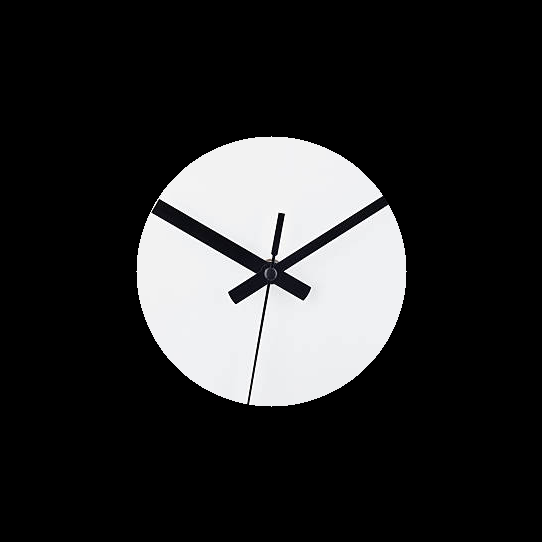

In [16]:
canvas= np.zeros( (h2, w2))
circles = cv2.HoughCircles(clk2_gray, cv2.HOUGH_GRADIENT, 1.2, 100)
if circles is not None:
  circles = np.round(circles[0, :]).astype("int")

  small_clock= None
  cur_rad= 0
  for (x, y, r) in circles:
    if r> cur_rad:
      cur_rad= r
      clock= (x, y, r)
  small_clock= cv2.circle(canvas, (clock[0], clock[1]), clock[2]//2, (225, 255, 225), -1)

imageCopy = clk2_clr.copy()
imageCopy[canvas == 0] = (0, 0, 0)

x = clock[0] - clock[2]
y = clock[1] - clock[2]
h = 2*clock[2]
w = 2*clock[2]

croppedImg = imageCopy[y:y + h, x:x + w]

	# show the output image
cv2_imshow( croppedImg)

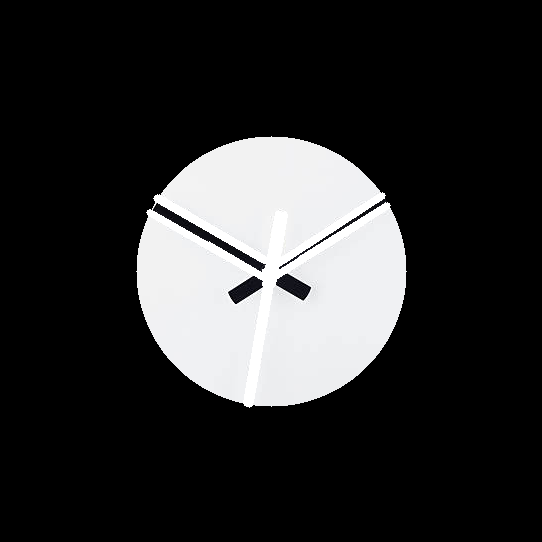

cleand clock



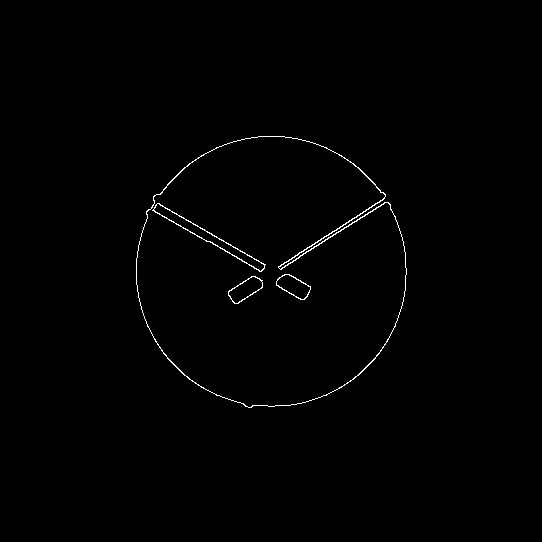

In [17]:
clk2_clean= fine_line_purge( croppedImg, thickness=5)
print('cleand clock\n')
_, binary = cv2.threshold(clk2_clean, 128, 255, cv2.THRESH_BINARY )
edge= cv2.Canny( binary, 100, 500, apertureSize=7)
cv2_imshow( edge)

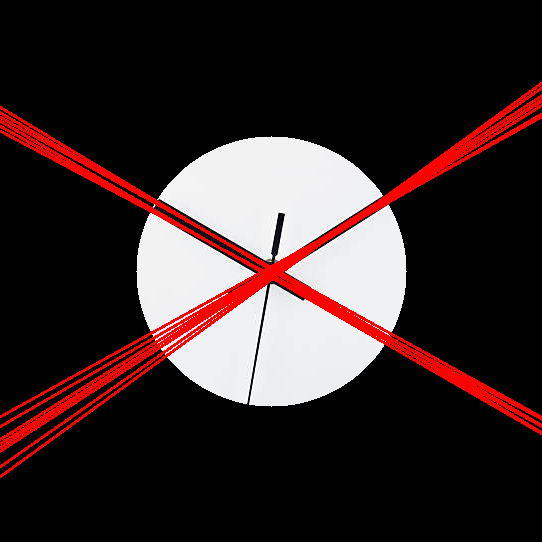

In [18]:

thetas= []
r_s=[]
lines = cv2.HoughLines(edge, 1, np.pi/180, 65)
for r_theta in lines:
    arr = np.array(r_theta[0], dtype=np.float64)
    r, theta = arr
    r_s.append(r)
    a = np.cos(theta)
    b = np.sin(theta)

    thetas.append( b/a)
    x0 = a*r
    y0 = b*r
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(croppedImg, (x1, y1), (x2, y2), (0, 0, 255), 2)
  
cv2_imshow( croppedImg)



In [19]:
len(lines)

import numpy as np
from sklearn.cluster import KMeans

thetas = np.array(thetas).reshape(-1, 1)

kmeans = KMeans(n_clusters=2, random_state=0).fit(thetas)

# find the mean of each cluster
means = [np.mean(thetas[kmeans.labels_ == i]) for i in range(kmeans.n_clusters)]

print("Means of each cluster:", means)

Means of each cluster: [1.5776284211386342, -1.7695338953298954]


In [20]:
import math
diff= abs( means[0]- means[1])

print(f'angle between the hands is {math.degrees(math.atan(diff)) }')

angle between the hands is 73.36593043810254


#### 5. (Fun with Landmarks) Choose three images of a world landmark from
the Google Landmark dataset (Link: https://storage.googleapis.com/gld-v2/web/index.html). The name of your chosen landmark should begin
with the first letter of your first name. For example: If your name is Adhrit,you could choose Amarnath. (a0) Resize all images to 256 × 256. Convert it
to gray. (a) Show the average of all three images. (c) Subtract Image 1 with

Image 2. (d) Add salt noise with 5% probability in one of the images. (e) Re-
move the noise. (f) Use the following 3×3 kernel: {−1, −1, −1; 0, 0, 0; 1, 1, 1}

for performing convolution in one of the images and show the output.

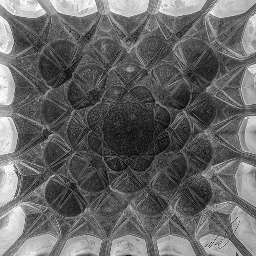

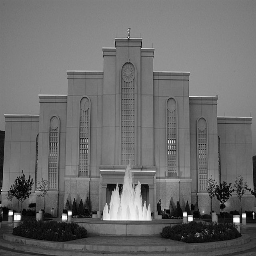

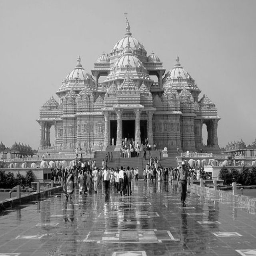

In [12]:
img1= cv2.imread('/content/computer_vision/csl7360/A1/Assignment-1/Problem-5/Aali-qapu.jpg')
img2= cv2.imread('/content/computer_vision/csl7360/A1/Assignment-1/Problem-5/abq-temple.jpg')
img3= cv2.imread('/content/computer_vision/csl7360/A1/Assignment-1/Problem-5/aksharadham.jpg')

img1= cv2.resize( img1, (256, 256))
img2= cv2.resize( img2, (256, 256))
img3= cv2.resize( img3, (256, 256))

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

cv2_imshow(img1)
cv2_imshow(img2)
cv2_imshow(img3)

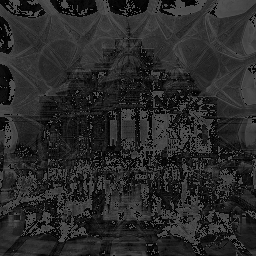

In [13]:
# average of images
imgx= img1+ img2+ img3
imgx = imgx/3
cv2_imshow( imgx)

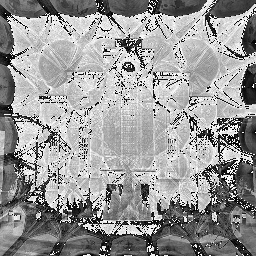

In [14]:
# difference of img1 and img2
cv2_imshow(img1-img2)

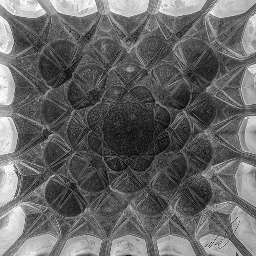

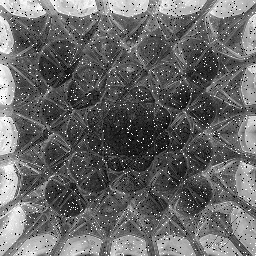

In [15]:
# salt and pepper @5%
h,w= img1.shape[0], img1.shape[1]
total_pixels = h*w
pick_pixels = int(0.05*total_pixels)

imgy= img1.copy()

import random

for i in range(pick_pixels):
  x = random.randint(0, w-1)
  y = random.randint(0, h-1)
  r1 = random.random()
  if r1>0.5:
    imgy[y][x]=255
  else:
    imgy[y][x]=0

cv2_imshow(img1)
cv2_imshow(imgy)

  


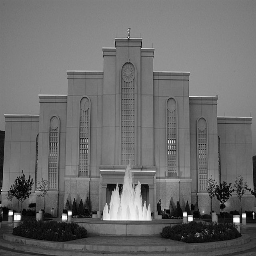

original




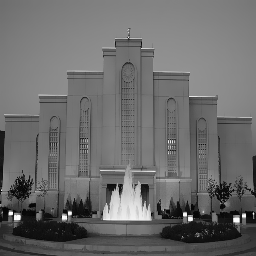

bilateral denoising




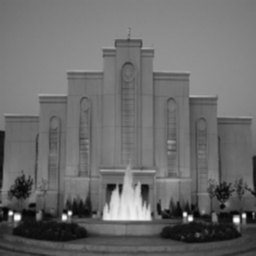

gausian denoising




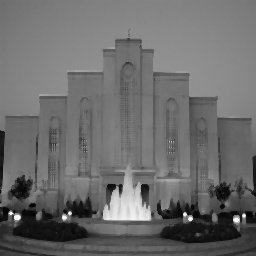

median denoising 




In [16]:
# 3 types of de-noise v/s original
imgz = img2.copy()
bilateral = cv2.bilateralFilter(imgz, 9, 7, 7)
gaussian_blur = cv2.GaussianBlur(imgz, (3, 3), 0)
median_blur = cv2.medianBlur(imgz, 3)

cv2_imshow( imgz)
print('original\n\n')
cv2_imshow(bilateral)
print('bilateral denoising\n\n')
cv2_imshow( gaussian_blur)
print('gausian denoising\n\n')
cv2_imshow( median_blur)
print('median denoising \n\n')


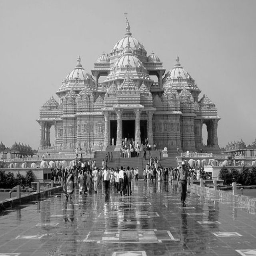

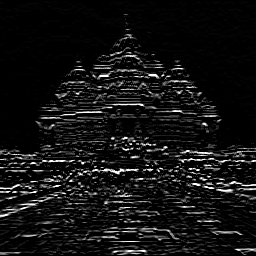

In [17]:
# sobel filter to find horizontal edges
import numpy as np
kernel = np.array([[-1,-1,-1], [0, 0, 0], [1,1,1]])

conv = cv2.filter2D(img3, -1, kernel)
cv2_imshow( img3)
cv2_imshow( conv)

#### 6. (Digit Recognition) You will be given 100 handwritten images of 0 and 1.
You have to compute horizontal projection profile features and use Nearest
Neighbour and SVM classifiers to recognize the digits. Report accuracy
and show some visual examples. Dataset (choose only 0 and 1): https://github.com/myleott/mnist_png.git

In [ ]:
!git clone https://github.com/myleott/mnist_png.git


fatal: destination path 'mnist_png' already exists and is not an empty directory.
tar: Old option 'g' requires an argument.
Try 'tar --help' or 'tar --usage' for more information.


In [ ]:
!tar -xvzf /content/mnist_png/mnist_png.tar.gz

In [ ]:
sample0= cv2.imread('/content/mnist_png/training/0/17285.png')
sample1= cv2.imread('/content/mnist_png/training/1/10006.png')

cv2_imshow( sample0)
cv2_imshow( sample1)

In [ ]:
'''creating train dataset'''
import os
import cv2
import numpy as np
import pandas as pd

folder0_path = "/content/mnist_png/training/0"
folder1_path = "/content/mnist_png/training/1"
image0_files = [f for f in os.listdir(folder0_path) if f.endswith(".png")]
image1_files = [f for f in os.listdir(folder1_path) if f.endswith(".png")]

data = []

for image_file in image0_files:
    img = cv2.imread(os.path.join(folder0_path, image_file), cv2.IMREAD_GRAYSCALE)
    height, width = img.shape

    horizontal_projection = np.zeros(height)
    for row in range(height):
        for col in range(width):
            if img[row, col] == 0:
                horizontal_projection[row] += 1

    data.append(np.append(horizontal_projection, [0]))

for image_file in image1_files:
    img = cv2.imread(os.path.join(folder1_path, image_file), cv2.IMREAD_GRAYSCALE)
    height, width = img.shape
    horizontal_projection = np.zeros(height)

    for row in range(height):
        for col in range(width):
            if img[row, col] == 0:
                horizontal_projection[row] += 1

    data.append(np.append(horizontal_projection, [1]))

data = np.array(data)
df = pd.DataFrame(data)

df.to_csv("train_dataset.csv", index=False)



In [ ]:
'''creating test dataset'''
import os
import cv2
import numpy as np
import pandas as pd

folder0_path = "/content/mnist_png/training/0"
folder1_path = "/content/mnist_png/training/1"
image0_files = [f for f in os.listdir(folder0_path) if f.endswith(".png")]
image1_files = [f for f in os.listdir(folder1_path) if f.endswith(".png")]

data = []

for image_file in image0_files:
    img = cv2.imread(os.path.join(folder0_path, image_file), cv2.IMREAD_GRAYSCALE)
    height, width = img.shape

    horizontal_projection = np.zeros(height)
    for row in range(height):
        for col in range(width):
            if img[row, col] == 0:
                horizontal_projection[row] += 1

    data.append(np.append(horizontal_projection, [0]))

for image_file in image1_files:
    img = cv2.imread(os.path.join(folder1_path, image_file), cv2.IMREAD_GRAYSCALE)
    height, width = img.shape
    horizontal_projection = np.zeros(height)

    for row in range(height):
        for col in range(width):
            if img[row, col] == 0:
                horizontal_projection[row] += 1

    data.append(np.append(horizontal_projection, [1]))

data = np.array(data)
df = pd.DataFrame(data)

df.to_csv("t_dataset.csv", index=False)


In [ ]:
train = pd.read_csv('/content/train_dataset.csv')
test = pd.read_csv('/content/t_dataset.csv')

train.head()

0     1     2     3     4     5     6     7     8     9  ...    19  \
0  28.0  28.0  28.0  28.0  22.0  20.0  17.0  17.0  20.0  19.0  ...  20.0   
1  28.0  28.0  28.0  28.0  28.0  21.0  17.0  15.0  13.0  13.0  ...  19.0   
2  28.0  28.0  28.0  28.0  24.0  23.0  21.0  18.0  17.0  17.0  ...  15.0   
3  28.0  28.0  28.0  28.0  28.0  21.0  17.0  16.0  14.0  15.0  ...  20.0   
4  28.0  28.0  28.0  28.0  18.0  13.0  13.0  15.0  20.0  20.0  ...  18.0   

     20    21    22    23    24    25    26    27   28  
0  17.0  14.0  15.0  19.0  28.0  28.0  28.0  28.0  0.0  
1  16.0  15.0  17.0  19.0  20.0  28.0  28.0  28.0  0.0  
2  15.0  16.0  18.0  21.0  28.0  28.0  28.0  28.0  0.0  
3  20.0  17.0  15.0  16.0  19.0  28.0  28.0  28.0  0.0  
4  12.0  14.0  16.0  20.0  28.0  28.0  28.0  28.0  0.0  

[5 rows x 29 columns]

In [ ]:
test.head()

0     1     2     3     4     5     6     7     8     9  ...    19  \
0  28.0  28.0  28.0  28.0  22.0  20.0  17.0  17.0  20.0  19.0  ...  20.0   
1  28.0  28.0  28.0  28.0  28.0  21.0  17.0  15.0  13.0  13.0  ...  19.0   
2  28.0  28.0  28.0  28.0  24.0  23.0  21.0  18.0  17.0  17.0  ...  15.0   
3  28.0  28.0  28.0  28.0  28.0  21.0  17.0  16.0  14.0  15.0  ...  20.0   
4  28.0  28.0  28.0  28.0  18.0  13.0  13.0  15.0  20.0  20.0  ...  18.0   

     20    21    22    23    24    25    26    27   28  
0  17.0  14.0  15.0  19.0  28.0  28.0  28.0  28.0  0.0  
1  16.0  15.0  17.0  19.0  20.0  28.0  28.0  28.0  0.0  
2  15.0  16.0  18.0  21.0  28.0  28.0  28.0  28.0  0.0  
3  20.0  17.0  15.0  16.0  19.0  28.0  28.0  28.0  0.0  
4  12.0  14.0  16.0  20.0  28.0  28.0  28.0  28.0  0.0  

[5 rows x 29 columns]

In [ ]:
X=  train.iloc[ :, :-1]
y= train.iloc[ : , -1]

##### SVM

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

clf1 = SVC(kernel='linear', C=1)
clf1.fit(X_train, y_train)

clf2 = SVC(kernel='poly', degree=3,  C=1)
clf2.fit(X_train, y_train)

y_pred1 = clf1.predict(X_val)
y_pred2 = clf2.predict(X_val)
accuracy1 = accuracy_score(y_val, y_pred1)
accuracy2 = accuracy_score(y_val, y_pred2)

print("Accuracy of linear kernel on validation data:", accuracy1)
print("Accuracy of poly kernel on validation data:", accuracy2)

X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]

y_test_pred1 = clf1.predict(X_test)
y_test_pred2 = clf2.predict(X_test)

test_accuracy1 = accuracy_score(y_test, y_test_pred1)
test_accuracy2 = accuracy_score(y_test, y_test_pred2)

# Print the accuracy
print("Accuracy of linear kernel on  test data:", test_accuracy1)
print("Accuracy of poly kernel on  test data:", test_accuracy2)


Accuracy of linear kernel on validation data: 0.9727595736281089
Accuracy of poly kernel on validation data: 0.9846032372680615
Accuracy of linear kernel on  test data: 0.9748124753257007
Accuracy of poly kernel on  test data: 0.9901302803000395


In [ ]:
sample0= cv2.imread('/content/mnist_png/training/0/5608.png')
height= sample0.shape[0]

horizontal_projection = np.zeros(height)
for row in range(height):
    for col in range(width):
        if img[row, col] == 0:
            horizontal_projection[row] += 1

horizontal_projection= horizontal_projection.reshape(-1, 1)
horizontal_projection=  horizontal_projection.T
cv2_imshow( sample0)
print( clf2.predict( horizontal_projection))

[0.]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
height= sample1.shape[0]

horizontal_projection = np.zeros(height)
for row in range(height):
    for col in range(width):
        if img[row, col] == 0:
            horizontal_projection[row] += 1

horizontal_projection= horizontal_projection.reshape(-1, 1)
horizontal_projection=  horizontal_projection.T
cv2_imshow( sample1)
print( clf1.predict( horizontal_projection))

[1.]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


##### KNN

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

print("Accuracy on validation data:", accuracy)

X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]
y_test_pred = clf.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on test data:", test_accuracy)


Accuracy on validation data: 0.9869719699960521
Accuracy on test data: 0.9906829846032372


In [ ]:
sample0= cv2.imread('/content/mnist_png/training/0/5608.png')
height= sample0.shape[0]

horizontal_projection = np.zeros(height)
for row in range(height):
    for col in range(width):
        if img[row, col] == 0:
            horizontal_projection[row] += 1

horizontal_projection= horizontal_projection.reshape(-1, 1)
horizontal_projection=  horizontal_projection.T
cv2_imshow( sample0)
print( clf.predict( horizontal_projection))

[0.]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:

height= sample1.shape[0]

horizontal_projection = np.zeros(height)
for row in range(height):
    for col in range(width):
        if img[row, col] == 0:
            horizontal_projection[row] += 1

horizontal_projection= horizontal_projection.reshape(-1, 1)
horizontal_projection=  horizontal_projection.T
cv2_imshow( sample1)
print( clf.predict( horizontal_projection))

[1.]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


#### 7. (White on Black or Black on White): Given a word image find out if the
word is bright text on a dark background or dark text on bright background.

In [22]:
import easyocr

url1= '/content/computer_vision/csl7360/A1/Assignment-1/Problem-7/11_1.png'
url2= '/content/computer_vision/csl7360/A1/Assignment-1/Problem-7/27_2.png'

img1= cv2.imread( url1)
img2= cv2.imread( url2)

reader= easyocr.Reader(['en'])
result1= reader.readtext(url1)
result2= reader.readtext(url2)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [27]:
def in_out(img,  result):
  '''basically calculates the average pixel value of text pixel and pixels that 
  are not part of text; and accordingly decides
  '''

  imgb= cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
  coors= result[0][0]
  top= coors[0][1]
  bottom = coors[2][1]
  left = coors[0][0]
  right = coors[2][0]

  h= img.shape[0]
  w= img.shape[1]

  pin_sum=0
  pout_sum=0
  pout= h*w -(right-left)*(bottom-top)
  pin= (right-left)*(bottom-top)

  for y in range(h):
    for x in range(w):
      if x>left and x<right and y>top and y<bottom:
        pin_sum += imgb[y][x]
      else: 
        pout_sum += imgb[y][x]

  out_rat= pout_sum/ pout
  in_rat= pin_sum/ pin

  cv2_imshow(img)
  if( out_rat > in_rat):
    print('Dark text on light bg')
  else:
    print('Light text on dark bg')
  
  print(f'Average pixel value of text box: {in_rat} \nAverage pixel value of remaining image: {out_rat}')
  

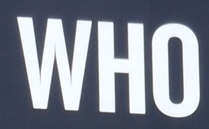

Light text on dark bg
Average pixel value of text box: 141.87044 
Average pixel value of remaining image: 73.62417134115248


In [28]:
in_out(img1, result1)

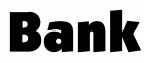

Dark text on light bg
Average pixel value of text box: 145.2674940898345 
Average pixel value of remaining image: 337.0065359477124


In [29]:
in_out(img2, result2)

#### 8. (Template Matching) Write your name in capital letters on a piece of
white paper and a random letter from your name. Click photographs of these.
Implement the Template Matching algorithm and discuss your observation.

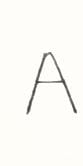

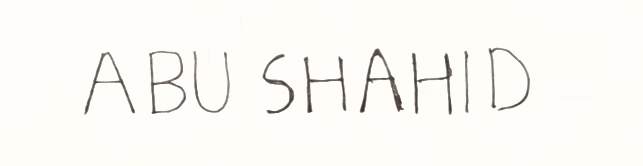

In [37]:
template= cv2.imread('/content/computer_vision/csl7360/A1/Assignment-1/Problem-8/template.jpg')
name_org= cv2.imread('/content/computer_vision/csl7360/A1/Assignment-1/Problem-8/name.jpg')
name_org2= name_org.copy()
name_org3= name_org.copy()
cv2_imshow(template)
cv2_imshow(name_org)

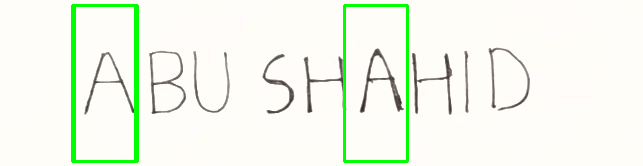

at threshold: 0.35


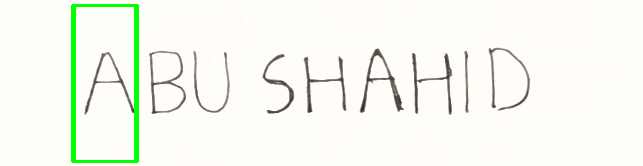

at threshold: 0.6


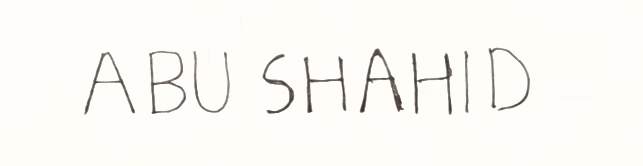

at threshold: 0.9


In [38]:
'''
ref: https://www.geeksforgeeks.org/template-matching-using-opencv-in-python/
'''

_, img = cv2.threshold(name_org, 128, 255, cv2.THRESH_BINARY)
res = cv2.matchTemplate(img, template, cv2.TM_CCOEFF_NORMED)

threshold = 0.35 ## Value of threshold had to be cherry picked
loc = np.where(res >= threshold)

for pt in zip(*loc[::-1]):
    h, w = template.shape[0], template.shape[1]
    top_left = (pt[0] + 15, pt[1] + 5)
    bottom_right = (pt[0] + w -5, pt[1] + h -5)
    cv2.rectangle(name_org, top_left, bottom_right, (0, 255, 0), 2)

cv2_imshow( name_org)
print(f'at threshold: {threshold}')



threshold = 0.6 ## Value of threshold had to be cherry picked
loc = np.where(res >= threshold)

for pt in zip(*loc[::-1]):
    h, w = template.shape[0], template.shape[1]
    top_left = (pt[0] + 15, pt[1] + 5)
    bottom_right = (pt[0] + w -5, pt[1] + h -5)
    cv2.rectangle(name_org2, top_left, bottom_right, (0, 255, 0), 2)

cv2_imshow( name_org2)
print(f'at threshold: {threshold}')



threshold = 0.9 ## Value of threshold had to be cherry picked
loc = np.where(res >= threshold)

for pt in zip(*loc[::-1]):
    h, w = template.shape[0], template.shape[1]
    top_left = (pt[0] + 15, pt[1] + 5)
    bottom_right = (pt[0] + w -5, pt[1] + h -5)
    cv2.rectangle(name_org3, top_left, bottom_right, (0, 255, 0), 2)

cv2_imshow( name_org3)
print(f'at threshold: {threshold}')

#### 9. (Histogram Equalization) Choose one image from Problem 5. Show his-
togram of pixel values with bin size 10. Perform histogram equalization and

show the output image.

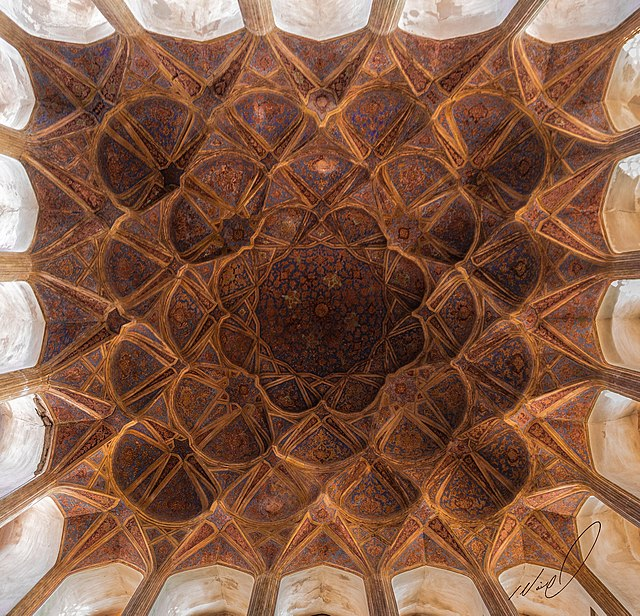

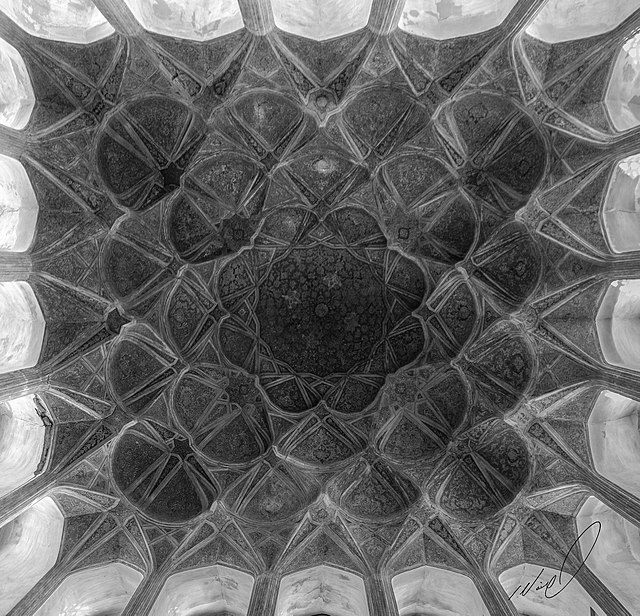

In [39]:
img = cv2.imread('/content/computer_vision/csl7360/A1/Assignment-1/Problem-5/Aali-qapu.jpg')
img_ = cv2.imread('/content/computer_vision/csl7360/A1/Assignment-1/Problem-5/Aali-qapu.jpg',
                  cv2.IMREAD_GRAYSCALE)

cv2_imshow( img)
cv2_imshow( img_)

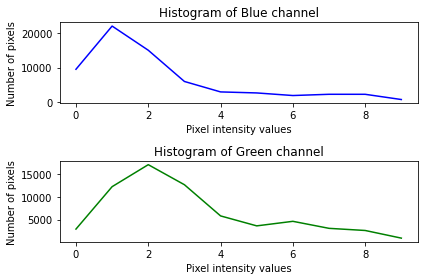

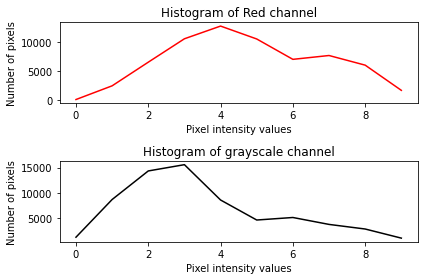

In [44]:
import matplotlib.pyplot as plt
b, g, r = cv2.split(img)

hist_b = cv2.calcHist([b],[0],None,[10],[0,256])
hist_g = cv2.calcHist([g],[0],None,[10],[0,256])
hist_r = cv2.calcHist([r],[0],None,[10],[0,256])
hist__ = cv2.calcHist([img_],[0],None,[10],[0,256])

# Plot the histograms
plt.subplot(2,1,1)
plt.plot(hist_b, color='blue')
plt.xlabel('Pixel intensity values')
plt.ylabel('Number of pixels')
plt.title('Histogram of Blue channel')

plt.subplot(2,1,2)
plt.plot(hist_g, color='green')
plt.xlabel('Pixel intensity values')
plt.ylabel('Number of pixels')
plt.title('Histogram of Green channel')

plt.tight_layout()
plt.show()


plt.subplot(2,1,1)
plt.plot(hist_r, color='red')
plt.xlabel('Pixel intensity values')
plt.ylabel('Number of pixels')
plt.title('Histogram of Red channel')


plt.subplot(2,1,2)
plt.plot(hist__, color='black')
plt.xlabel('Pixel intensity values')
plt.ylabel('Number of pixels')
plt.title('Histogram of grayscale channel')

plt.tight_layout()
plt.show()


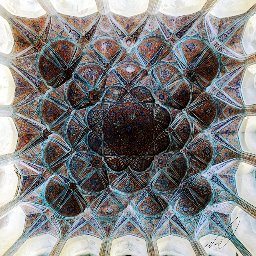

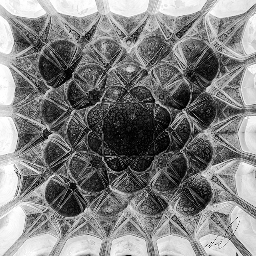

In [45]:

equalized_r = cv2.equalizeHist(r)
equalized_g = cv2.equalizeHist(g)
equalized_b = cv2.equalizeHist(b)
equalized__ = cv2.equalizeHist(img_)

img_norm= cv2.merge([ equalized_r, equalized_g, equalized_b] )
# Display the original and equalized images
cv2_imshow( img_norm)
cv2_imshow( equalized__)


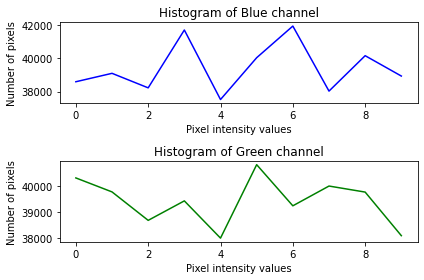

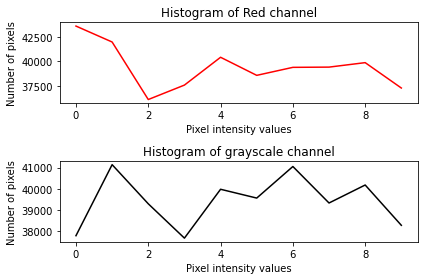

In [ ]:
import matplotlib.pyplot as plt
b, g, r = cv2.split(img_norm)

hist_b = cv2.calcHist([b],[0],None,[10],[0,256])
hist_g = cv2.calcHist([g],[0],None,[10],[0,256])
hist_r = cv2.calcHist([r],[0],None,[10],[0,256])
hist__ = cv2.calcHist([equalized__],[0],None,[10],[0,256])

# Plot the histograms
plt.subplot(2,1,1)
plt.plot(hist_b, color='blue')
plt.xlabel('Pixel intensity values')
plt.ylabel('Number of pixels')
plt.title('Histogram of Blue channel')

plt.subplot(2,1,2)
plt.plot(hist_g, color='green')
plt.xlabel('Pixel intensity values')
plt.ylabel('Number of pixels')
plt.title('Histogram of Green channel')

plt.tight_layout()
plt.show()


plt.subplot(2,1,1)
plt.plot(hist_r, color='red')
plt.xlabel('Pixel intensity values')
plt.ylabel('Number of pixels')
plt.title('Histogram of Red channel')


plt.subplot(2,1,2)
plt.plot(hist__, color='black')
plt.xlabel('Pixel intensity values')
plt.ylabel('Number of pixels')
plt.title('Histogram of grayscale channel')

plt.tight_layout()
plt.show()


#### 10. (Reading Mobile Number) You will be given image of a mobile number.
Use off-the-shelf OCR and find out the last three digits of the mobile number.

In [ ]:
url1= '/content/computer_vision/csl7360/A1/Assignment-1/Problem-10/Screenshot 2023-01-08 at 5.14.24 PM.png'
url2= '/content/computer_vision/csl7360/A1/Assignment-1/Problem-10/Screenshot 2023-01-08 at 5.14.47 PM.png'

import easyocr

img1= cv2.imread( url1)
img2= cv2.imread( url2)

reader= easyocr.Reader(['en'])
result1= reader.readtext(url1)
result2= reader.readtext(url2)

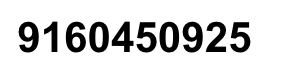

last 3 digits are 925


In [ ]:
cv2_imshow( img1)
print( f'last 3 digits are {result1[0][1][-3:]}')

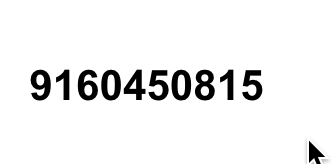

last 3 digits are 815


In [ ]:
cv2_imshow( img2)
print( f'last 3 digits are {result2[0][1][-3:]}')

#### References:
* https://www.geeksforgeeks.org/template-matching-using-opencv-in-python/